# Projeto 1 - Ciência dos Dados

Nome: Victor Jurdi Gomes

## Pergunta (s) a ser respondida

Existe uma diminuição da taxa de  demprego em países que passam a fazer parte da OCDE?

## Explicação da hipótese e mecanismo


A OCDE tem como objetivo desenvolver políticas para influenciar no desenvolvimento econômico e o bem-estar social de pessoas por todo o mundo. Portanto pode-se esperar que países membros tornem-se mais atraentes para investidores e assim tenham um maior indice de crescimento econômico.

https://internacional.estadao.com.br/noticias/geral,antes-e-depois-a-economia-dos-ultimos-paises-a-entrar-na-ocde,70002762360

## Bases de dados usadas

Link usado para download da basae de dados:https://www.gapminder.org/data/

As variáveis usadas para análise no projeto são:

°A taxa de desemprego em um país.

°A taxa de investimentos externos entrando no país

## Análise de dados

Insira abaixo uma análise de dados tratada para ter maior clareza. 

Lembre-se de que, além deste arquivo principal, você precisa entregar um ou mais *notebooks* mais brutos com todas as tentativas que fez e que não deram certo .

**Não inclua dados ou gráficos sem motivação nem interpretação** - sempre que fizer uma análise, plot ou tablea, diga qual sua intenção. Logo após a apresentação diga qual conclusão específica ou interpretação você tira daquela análise

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from math import *

In [35]:
desemprego=pd.read_excel('aged_15plus_unemployment_rate_percent.xlsx')
invest=pd.read_excel('foreign_direct_investment_net_inflows_percent_of_gdp.xlsx')

In [63]:
desemprego.head()

,country,1947,1948,1949,1950,1951,1952,1953,1954,1955,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.49,NaN,NaN,NaN,1.69,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.10,13.7,14.10,13.50,13.40,15.90,17.5,17.1,15.2,13.8
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.30,10.2,9.96,9.96,11.00,9.82,10.2,11.2,10.2,13.6
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.43,16.80,NaN,NaN,NaN,NaN,NaN,NaN
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
invest.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.0132,0.0246,0.0094,0.0156,NaN,NaN,0.00157,-0.00813,NaN,...,0.396,0.449,1.20,0.291,0.277,0.238,0.208,0.880,0.481,0.256
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.730,11.200,9.14,8.130,7.450,9.820,8.690,8.690,8.790,7.840
2,Algeria,1.6500,0.0118,0.6140,0.5850,2.71,0.765,1.05000,0.85100,0.513,...,1.540,2.000,1.43,1.290,0.718,0.807,0.703,-0.324,1.030,0.705
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.990,2.920,-3.91,-2.900,-6.050,-5.700,1.520,9.050,-0.188,-5.960
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.84000,-7.850,...,11.600,6.590,8.39,5.710,10.700,11.300,3.360,7.050,3.350,3.970


Para analisar o comportamento de países que ingressaram na OCDE, teremos como referencia os países chile, estonia e israel que entraram na organização em 2010


In [69]:
x=desemprego.iloc[[32,51,75], [63, 64, 65,66]]
x.head()

,2009,2010,2011,2012
32,11.30,8.42,7.34,6.66
51,13.50,16.70,12.30,10.00
75,9.53,8.48,7.14,6.86


In [68]:
y=invest.iloc[[33,53,78], [40, 41, 42,43]]
y.head()

,2009,2010,2011,2012
33,8.04,7.33,9.57,11.30
53,9.49,13.30,4.83,7.76
78,2.22,2.99,3.31,3.50


In [72]:
x.rename(index = {32: "Chile", 51:"Estonia", 75:"Israel" }, 
                                 inplace = True)

y.rename(index = {33: "Chile", 53:"Estonia", 78:"Israel" }, 
                                 inplace = True)


In [74]:
x.head()

,2009,2010,2011,2012
Chile,11.30,8.42,7.34,6.66
Estonia,13.50,16.70,12.30,10.00
Israel,9.53,8.48,7.14,6.86


In [73]:
y.head()

,2009,2010,2011,2012
Chile,8.04,7.33,9.57,11.30
Estonia,9.49,13.30,4.83,7.76
Israel,2.22,2.99,3.31,3.50


Podemos perceber apenas observando a tabela que a partir do ano de 2010 a taxa de desemprego abaixou e a taxa de investimentos vindos do exterior aumentou nos 3 países analisados.

In [88]:
des_2011=desemprego.loc[:,[2011]]
invest_2011=invest.loc[:,[2011]]

df = des_2011.join(invest_2011, how='inner', lsuffix='_des', rsuffix='_invest')
df.head()

,2011_des,2011_invest
0,NaN,0.291
1,13.50,8.130
2,9.96,1.290
3,16.80,-2.900
4,NaN,5.710


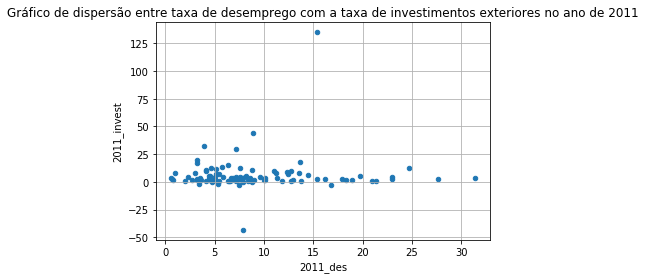

In [91]:
df.plot.scatter(x="2011_des",y="2011_invest");
plt.title('Gráfico de dispersão entre taxa de desemprego com a taxa de investimentos exteriores no ano de 2011')
plt.grid(True)

In [92]:
df.corr()

,2011_des,2011_invest
2011_des,1.00000,0.05917
2011_invest,0.05917,1.00000


## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados

    Ao fazer as devidas análises, podemos perceber que existe sim uma diminuição na taxa de desemprego em países que engressaram na OCDE. Para a anáise foram escolhidos 3 países que entraram na organização no mesmo ano (2010), sendo eles: Chile, Estonia e Israel, onde todos tiveram um aumento consideravel do PIB após firmarem o acordo. Percebe-se também um aumento na taxa de investimento externo nestes países logo após a entrada deles na OCDE. Pensando em escala econômica, podemos inferir que ao os países entrarem na organização fez com que o eles ficassem mais chamativos para os investidores, assim impulssionou a ecônomia e espaço para o país se desenvolver, gerando assim mais empregos.